In [2]:
import pandas as pd
import numpy as np

In [10]:
## Manejo de datos: carga de csv

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv", low_memory = False)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

print(train.shape)

print("Primeras lineas de features:")
print(train.head(5))

print("describe: ")
print(train.describe())

print("info: ")
print(train.info())

(19414, 807)
Primeras lineas de features:
     person  cantidad_eventos (Enero)  Brazil (Enero)  \
0  0566e9c1                       0.0             0.0   
1  6ec7ee77                       0.0             0.0   
2  abe7a2fb                       0.0             0.0   
3  34728364                       0.0             0.0   
4  87ed62de                       0.0             0.0   

   Unknown_country (Enero)  United States (Enero)  Argentina (Enero)  \
0                      0.0                    0.0                0.0   
1                      0.0                    0.0                0.0   
2                      0.0                    0.0                0.0   
3                      0.0                    0.0                0.0   
4                      0.0                    0.0                0.0   

   Canada (Enero)  France (Enero)  Uruguay (Enero)  Italy (Enero)  ...    \
0             0.0             0.0              0.0            0.0  ...     
1             0.0             

Clase en pie chart:


Text(0,0.5,'')

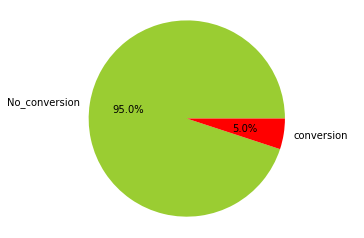

In [12]:
# Chequeo de clases que contienen 1 como conversion y 0 como no conversion
print("Clase en pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(train.label.value_counts(),autopct='%1.1f%%', labels=['No_conversion','conversion'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')


Ahora es el momento de dividir los datos en conjunto de prueba (20%) y conjunto de entrenamiento (80%). Defino una funcion 

In [42]:
def split_data(train, drop_list):
    train = train.drop(drop_list,axis=1)
    print(train.columns)
    
    #test train split time
    from sklearn.model_selection import train_test_split
    y = train['label'].values #target
    X = train.drop(['person','label'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("conversiones en set de testeo: ", sum(y_test))
    return X_train, X_test, y_train, y_test

A continuación se muestra la función para definir el clasificador y obtener predicciones. Podemos usar el método "predict ()" que verifica si un registro debe pertenecer a la clase "conversion" o "no_conversion". Hay otro método "predict_proba ()" que da las probabilidades para cada clase. Nos ayuda a aprender la idea de cambiar el umbral que asigna una instancia a la clase 1 o 0, por lo que podemos controlar la precisión y las puntuaciones de recuperación. Esto se usaría para calcular el área bajo ROC.

In [43]:
def get_predictions(clasiffier, X_train, y_train, X_test):
    # crear clasificador
    clf = clasiffier
    # ajustarlo a los datos de entrenamiento
    clf.fit(X_train,y_train)
    # predecir utilizando datos de test
    y_pred = clf.predict(X_test)
    # Calcular probabilidades pronosticadas: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #por diversión: predicciones de train-set
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

Función para imprimir los puntajes del clasificador.

In [44]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [49]:
#NB
drop_list = []
X_train, X_test, y_train, y_test = split_data(train, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)


Index(['person', 'cantidad_eventos (Enero)', 'Brazil (Enero)',
       'Unknown_country (Enero)', 'United States (Enero)', 'Argentina (Enero)',
       'Canada (Enero)', 'France (Enero)', 'Uruguay (Enero)', 'Italy (Enero)',
       ...
       'Ametista_checkouts_conversiones (Mayo)_y',
       'Cinza_checkouts_conversiones (Mayo)_y',
       'Ouro_checkouts_conversiones (Mayo)_y',
       'Preto Brilhante_checkouts_conversiones (Mayo)_y',
       'Bom_conversiones (Mayo)_y', 'Excelente_conversiones (Mayo)_y',
       'Muito Bom_conversiones (Mayo)_y',
       'Bom - Sem Touch ID_conversiones (Mayo)_y',
       'Novo_conversiones (Mayo)_y', 'label'],
      dtype='object', length=807)
train-set size:  15531 
test-set size:  3883
conversiones en set de testeo:  196
train-set confusion matrix:
 [[ 1238 13509]
 [   27   757]]
test-set confusion matrix:
 [[ 277 3410]
 [  25  171]]
recall score:  0.8724489795918368
precision score:  0.0477520245741413
f1 score:  0.09054805401111993
accuracy score:  0.1

In [ ]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)


Hagamos ahora las predicciones con otro clasificador: regresión logística.

Mi objetivo es comparar el rendimiento, es decir, recordar la puntuación de GaussianNB () con la puntuación de recuperación del regresor logístico para el conjunto de datos de prueba (que es el 20% del conjunto de datos completo, seleccionado arriba).

Voy a empezar con correr

Regresor logístico predeterminado
para el conjunto de datos completo desequilibrado (sé que es un mal enfoque, pero esto es solo para obtener una estimación aproximada)
  - que se ha dividido en subconjuntos de prueba de train (80:20)

In [55]:
#Caso 1 LR por default
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train-set confusion matrix:
 [[14745     2]
 [  784     0]]
test-set confusion matrix:
 [[3685    2]
 [ 196    0]]
recall score:  0.0
precision score:  0.0
f1 score:  0.0
accuracy score:  0.9490084985835694
ROC AUC: 0.716404991614221


Al aprender de un conjunto de datos totalmente desequilibrado, este regresor logístico predeterminado funciona muy mal. Así que intentemos entrenarlo de manera tradicional, es decir, a partir de datos de muestra inferior.

In [52]:
# obtener indices para conversiones
conversions_ind = np.array(train[train.label == 1].index)
no_conversiones_ind = train[train.label == 0].index
n_conv = len(train[train.label == 1])
# random selection from no_conversion class
random_no_conv_ind = np.random.choice(no_conversiones_ind, n_conv, replace = False)
random_no_conv_ind = np.array(random_no_conv_ind)
# merge two class indices: random no_conv + original conv
under_sample_ind = np.concatenate([conversions_ind,random_no_conv_ind])
# Under sample dataset
undersample_df = train.iloc[under_sample_ind,:]
y_undersample  = undersample_df['label'].values #target
X_undersample = undersample_df.drop(['person','label'],axis=1).values #features

In [54]:
 #entrenando logistic regression con under sample data
# Caso-LR-2

drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['person', 'cantidad_eventos (Enero)', 'Brazil (Enero)',
       'Unknown_country (Enero)', 'United States (Enero)', 'Argentina (Enero)',
       'Canada (Enero)', 'France (Enero)', 'Uruguay (Enero)', 'Italy (Enero)',
       ...
       'Ametista_checkouts_conversiones (Mayo)_y',
       'Cinza_checkouts_conversiones (Mayo)_y',
       'Ouro_checkouts_conversiones (Mayo)_y',
       'Preto Brilhante_checkouts_conversiones (Mayo)_y',
       'Bom_conversiones (Mayo)_y', 'Excelente_conversiones (Mayo)_y',
       'Muito Bom_conversiones (Mayo)_y',
       'Bom - Sem Touch ID_conversiones (Mayo)_y',
       'Novo_conversiones (Mayo)_y', 'label'],
      dtype='object', length=807)
train-set size:  1568 
test-set size:  392
conversiones en set de testeo:  196
train-set confusion matrix:
 [[532 252]
 [308 476]]
test-set confusion matrix:
 [[121  75]
 [ 75 121]]
recall score:  0.6173469387755102
precision score:  0.6173469387755102
f1 score:  0.6173469387755102
accuracy score:  0.6173469387755102

/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
